In [0]:
import pandas as pd 
import itertools
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
% matplotlib inline

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import joblib

In [15]:
diabetes_df = pd.read_csv('diabetes.csv')
print(diabetes_df.head())


   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


In [16]:
diabetes_df.info()
diabetes_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


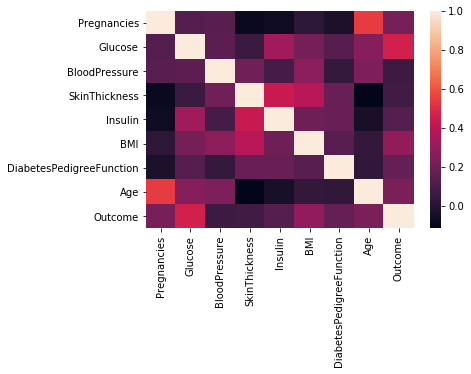

In [17]:
corr = diabetes_df.corr()
print(corr)
sns.heatmap(corr,
           xticklabels=corr.columns,
           yticklabels=corr.columns)

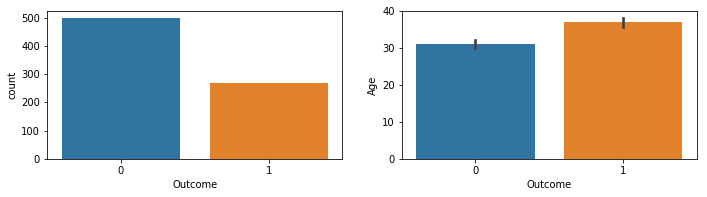

In [18]:
plt.subplots(figsize=(18,15))
plt.subplot(4,3,1)
plt.subplots_adjust(wspace=0.2,hspace=0.5)
sns.countplot(x='Outcome',data=diabetes_df )
plt.subplot(4,3,2)
plt.subplots_adjust(wspace=0.2,hspace=0.5)
sns.barplot(x='Outcome',y='Age',data=diabetes_df)
plt.show()

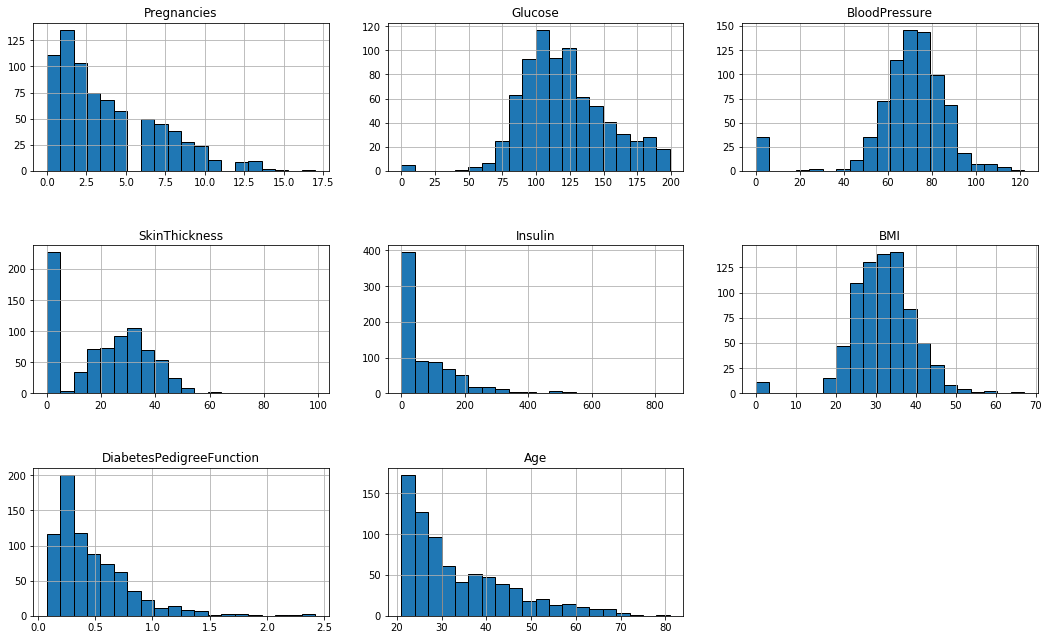

In [19]:
#data analysis 
columns = diabetes_df.columns[:8]
# print(columns)
plt.subplots(figsize=(18,15))
length = len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
  plt.subplot((length/2),3,j+1)
  plt.subplots_adjust(wspace=0.2,hspace=0.5)
  diabetes_df[i].hist(bins=20,edgecolor='black')
  plt.title(i)
plt.show()

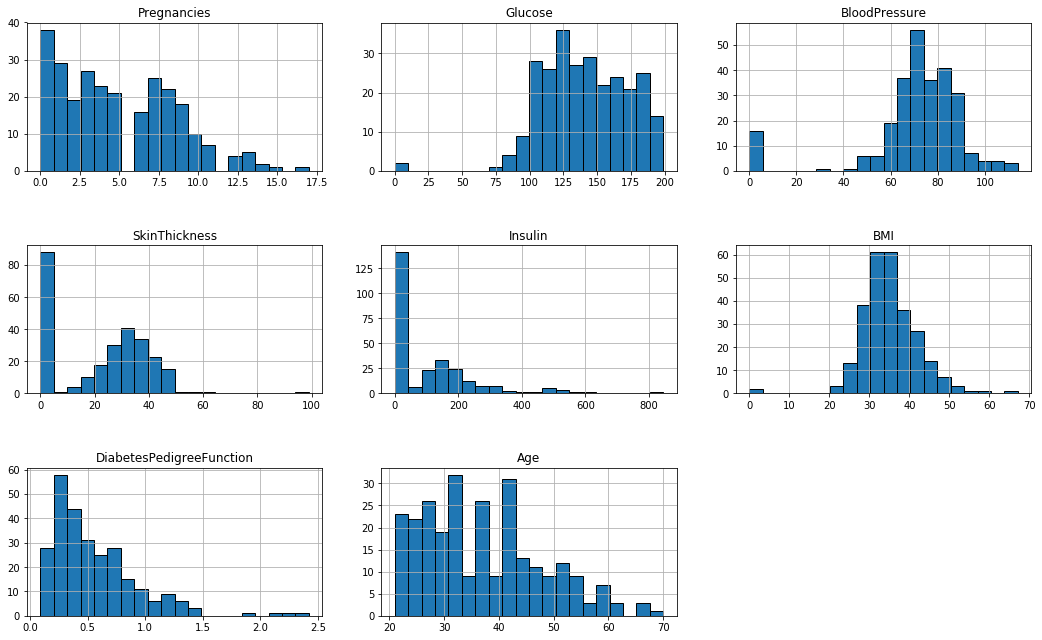

In [20]:
#analysis of diabetic classes 
diabetes_class = diabetes_df[diabetes_df['Outcome']==1]
columns=diabetes_df.columns[:8]
plt.subplots(figsize=(18,15))
length = len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
  plt.subplot((length/2),3,j+1)
  plt.subplots_adjust(wspace=0.2,hspace=0.5)
  diabetes_class[i].hist(bins=20,edgecolor='black')
  plt.title(i)
  
plt.show()

In [0]:
#data segrigation for train test check
# train=diabetes_df[:650]
# test=diabetes_df[650:750]
# check=diabetes_df[750:]

# trainlabel = np.asarray(train['Outcome'])
# print(trainlabel)

outcome = diabetes_df['Outcome']
data = diabetes_df[diabetes_df.columns[:8]]

train,test=train_test_split(diabetes_df,test_size=0.25,random_state=0,stratify=diabetes_df['Outcome'])# stratify the outcome
train_x = train[train.columns[:8]]
test_x = test[test.columns[:8]]
train_y = train['Outcome']
test_y = test['Outcome']
# print(train)

In [22]:
train_x.head(2)
train_y.head(2)

432    0
453    0
Name: Outcome, dtype: int64

In [24]:
#SVM
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(train_x,train_y)
    prediction=model.predict(test_x)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,test_y))

Accuracy for SVM kernel= rbf is 0.6510416666666666
Accuracy for SVM kernel= linear is 0.7708333333333334


In [25]:
#Logistic Regression 

model=LogisticRegression()
model.fit(train_x,train_y)
prediction = model.predict(test_x)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.7760416666666666


In [31]:
#Decision Tree
model=DecisionTreeClassifier()
model.fit(train_x,train_y)
prediction = model.predict(test_x)
print('The accuracy of the Decision tree classifier is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision tree classifier is 0.7604166666666666


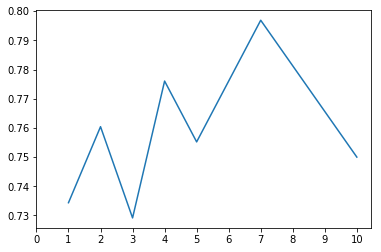

Accuracies for different values of n are: [0.734375   0.76041667 0.72916667 0.77604167 0.75520833 0.77604167
 0.796875   0.78125    0.765625   0.75      ]


In [33]:
#k-nearest Neighbour
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_x,train_y)
    prediction=model.predict(test_x)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()
print('Accuracies for different values of n are:',a.values)

In [35]:
#In Nutshell 
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_x,train_y)
    prediction=model.predict(test_x)
    abc.append(metrics.accuracy_score(prediction,test_y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.770833
Radial Svm,0.651042
Logistic Regression,0.776042
KNN,0.729167
Decision Tree,0.744792
